In [1]:
import os
from pathlib import Path
import sys

if "__project_dir__" not in globals():
    __project_dir__ = Path.cwd().parents[1].resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [2]:
import numpy as np
from src.model_analyser import ModelAnalyser
from src.model import tcr_metric, tcr_representation_model

/home/yutanagano/Projects/tcr_embedder/.venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
analyser = ModelAnalyser()
model = tcr_representation_model.load_blastr_save(Path("/home/yutanagano/UCLOneDrive/MBPhD/projects/tcr_embedder/model_saves/AB_SCEPTR_1"))
# model.distance_bins = np.linspace(0, 0.8, num=21)

In [4]:
# model = tcr_metric.BetaCdr3Levenshtein()

In [5]:
model.name

'AB SCEPTR'

Running KnnAnalysis...


/home/yutanagano/Projects/tcr_embedder/.venv/lib64/python3.11/site-packages/torch/nn/modules/transformer.py:296: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


Running PrecisionRecallAnalysis...


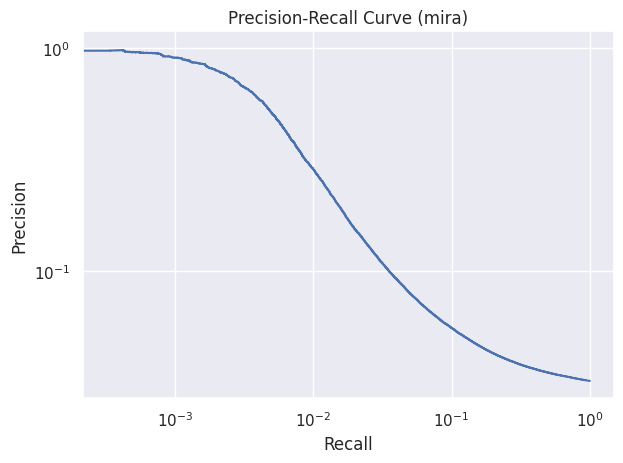

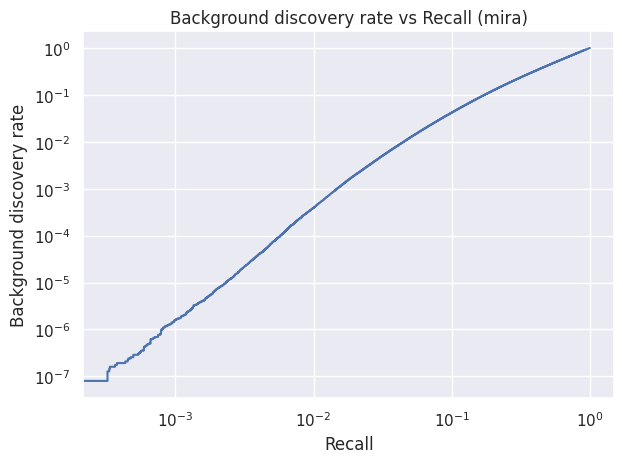

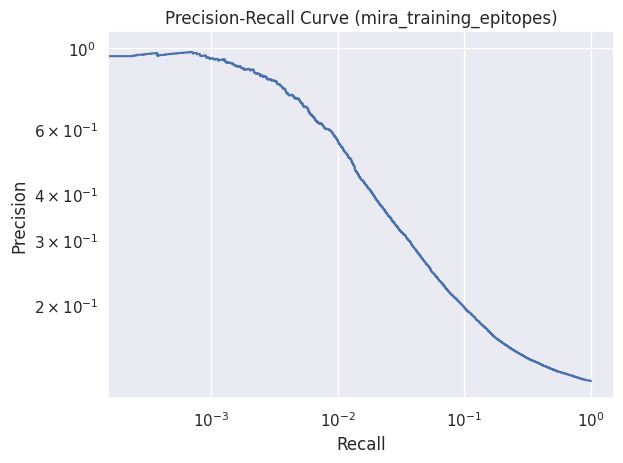

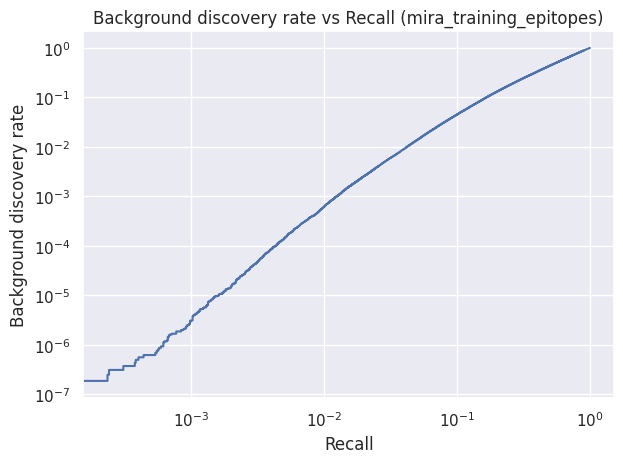

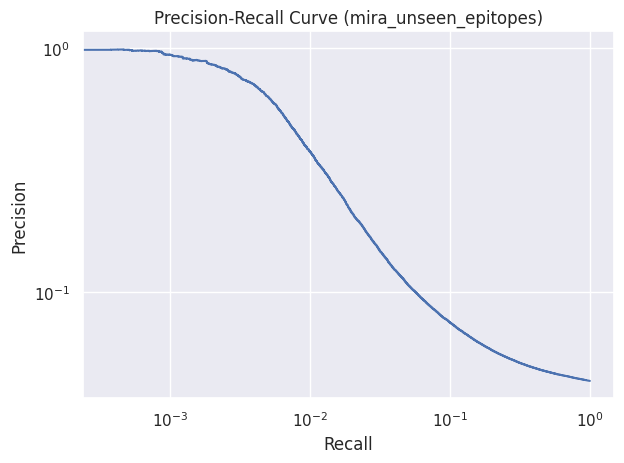

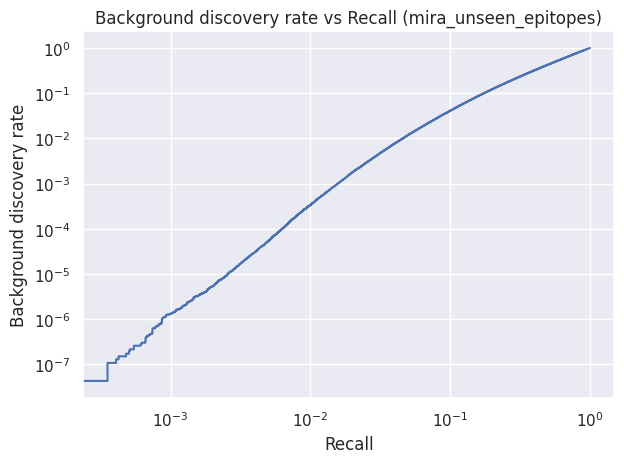

In [6]:
analyser.analyse(model)